# Churn Analysis (Data Science Project)

# 1.&nbsp;Import relevant libraries

In [1]:
# Import relevant libraries

# Standard libraries for data analysis:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew


# sklearn modules for data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# sklearn modules for Model Selection
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


#sklearn modules for Model Evaluation & Improvement

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score, make_scorer, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold, cross_validate, cross_val_predict

#Standard libraries for data visualization

import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix

# Miscellaneous Utilitiy Libraries
import random
from datetime import datetime
import string

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2.&nbsp;Import dataset

In [98]:
# Import the dataset
file_dir = '/content/customer_churn_data.csv' # Sesuaikan!
dataset = pd.read_csv(file_dir)

# Read Dataset
display(dataset)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# 3.&nbsp;Evaluate Data Structure

In [99]:
# Evaluate data structure
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [100]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [101]:
# Recheck Column Datatypes and Missing Values:

data_desc = (
    dataset
    .columns
    .to_series()
    .groupby(dataset.dtypes)
    .groups.items()
)

for dtype, columns in data_desc:
    print(f"{dtype}:")
    for col in columns:
        print(f"  - {col}")

int64:
  - SeniorCitizen
  - tenure
float64:
  - MonthlyCharges
  - TotalCharges
object:
  - customerID
  - gender
  - Partner
  - Dependents
  - PhoneService
  - MultipleLines
  - InternetService
  - OnlineSecurity
  - OnlineBackup
  - DeviceProtection
  - TechSupport
  - StreamingTV
  - StreamingMovies
  - Contract
  - PaperlessBilling
  - PaymentMethod
  - Churn


In [102]:
# check missing values
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [103]:
def unique_categorical_values(dataset, column_name):
    """
    Prints the number and list of unique values for a specified
    categorical column in a Pandas DataFrame.

    Args:
        dataset: The Pandas DataFrame.
        column_name: The name of the categorical column.
    """
    try:
        print(f"Number of unique {column_name}: {dataset[column_name].nunique()}")
        print(f"Unique {column_name}:")
        for value in dataset[column_name].unique():
            print(f"- {value}")
    except KeyError:
        print(f"Error: Column '{column_name}' not found in the dataset.")

In [104]:
unique_categorical_values(dataset, "PaymentMethod")

Number of unique PaymentMethod: 4
Unique PaymentMethod:
- Electronic check
- Mailed check
- Bank transfer (automatic)
- Credit card (automatic)


In [105]:
unique_categorical_values(dataset, "Contract")

Number of unique Contract: 3
Unique Contract:
- Month-to-month
- One year
- Two year


# 4.&nbsp;Check Target Variable Distribution

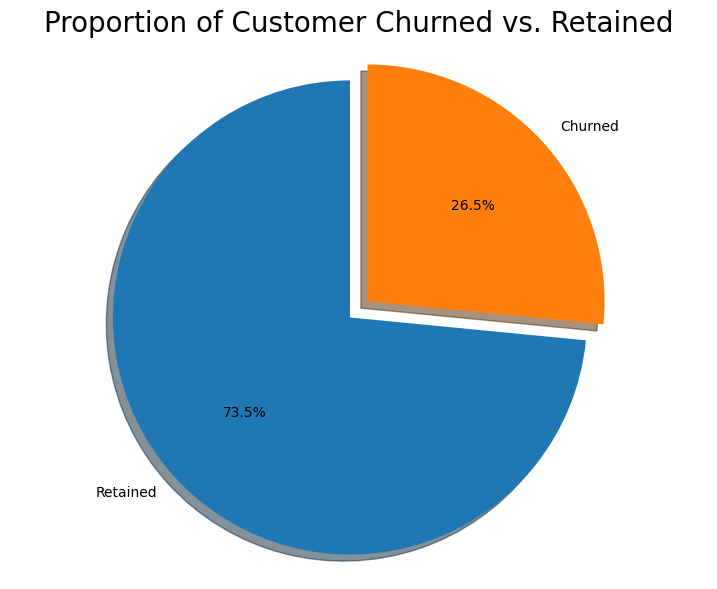

In [106]:
target_column = 'Churn'
labels = 'Retained', 'Churned'

sizes = [
    dataset[target_column][dataset[target_column]=="No"].count(),
    dataset[target_column][dataset[target_column]=="Yes"].count()
]

explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(9, 7))
ax.pie(
    sizes, explode=explode,
    labels=labels, autopct='%1.1f%%',
    shadow=True, startangle=90
)

ax.axis('equal')
plt.title("Proportion of Customer Churned vs. Retained", size=20)
plt.show()

What happen here?

Answer:

Dataset ini tidak seimbang (imbalanced dataset), karena jumlah pelanggan yang tidak churn jauh lebih banyak daripada yang churn.
Jika kita menggunakan data ini untuk machine learning, model bisa cenderung bias terhadap kelas mayoritas ("No")/Retained.

# 5.&nbsp;Clean the Dataset

In [107]:
dataset["TotalCharges"]

,TotalCharges
0,29.85
1,1889.50
2,108.15
3,1840.75
4,151.65
...,...
7038,1990.50
7039,7362.90
7040,346.45
7041,306.60


In [108]:
# Clean the Dataset
dataset["TotalCharges"] = pd.to_numeric(
    dataset["TotalCharges"],
    errors='coerce'
)

dataset["TotalCharges"] = dataset["TotalCharges"].astype("float")

In [109]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [111]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


In [112]:
# Take care of missing data
# Find the mean/median and fill missing values of each columns programmatically.

# Identify columns with missing values
na_cols = dataset.columns[dataset.isna().any()].tolist()

# Iterate through columns with missing values
for col in na_cols:
    if pd.api.types.is_numeric_dtype(dataset[col]):
        # Fill numeric columns with the median/mean
        dataset[col] = dataset[col].fillna(dataset[col].median())
    else:
        # Fill non-numeric columns with the mode
        dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

In [113]:
dataset.isna().any()

,0
customerID,False
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False


# 6.&nbsp;Label Encode Binary Data

In [117]:
# Label Encode Binary data

# Create a LabelEncoder object
le = LabelEncoder()

# Identify columns with 2 or fewer unique values and are of object type
# label encoding cuma buat binary (yes/no -> 2 values)
binary_cols = [col for col in dataset.columns[1:] if dataset[col].dtype == 'object' and len(dataset[col].unique()) <= 2]

# Label encode the identified columns
for col in binary_cols:
    dataset[col] = le.fit_transform(dataset[col])

print(f"{len(binary_cols)} columns were label encoded.")

0 columns were label encoded.


In [118]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


# 7.&nbsp;Exploratory Data Analysis

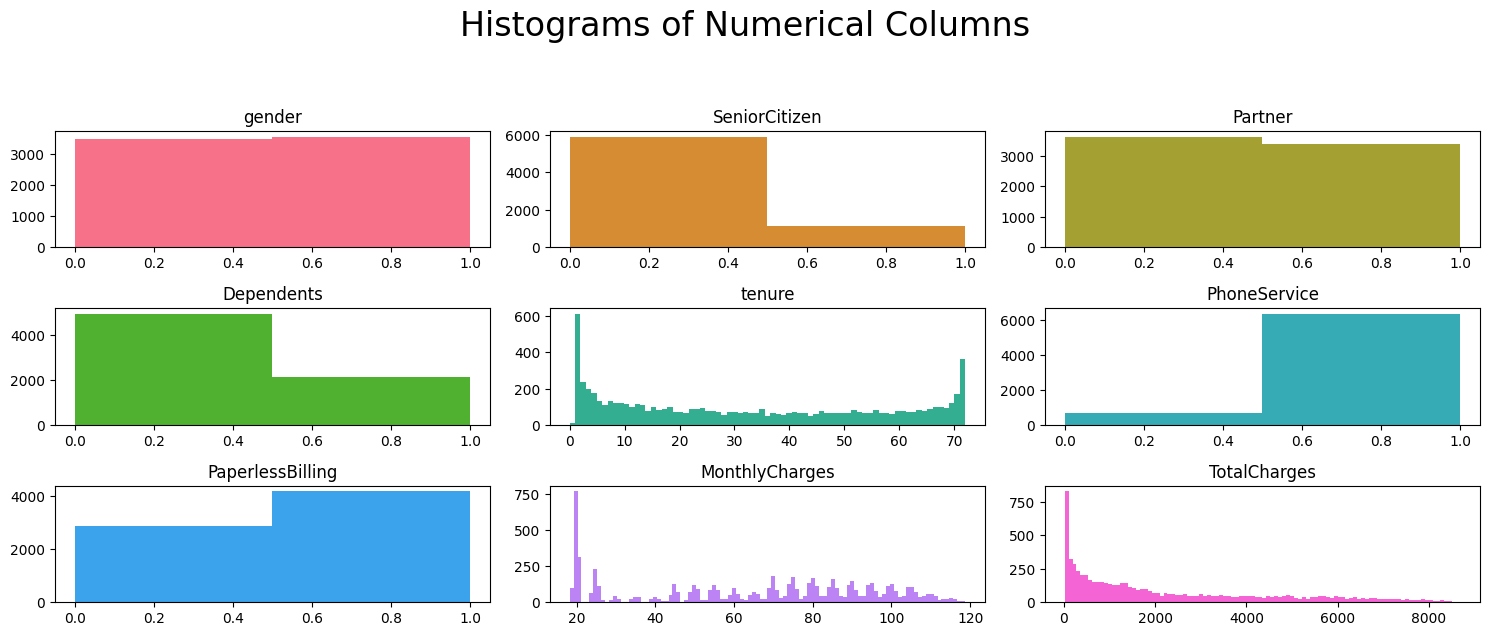

In [119]:
# Exploratory Data Analysis

# Plot Histogram of numeric Columns
subcols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'tenure',
    'PhoneService',
    'PaperlessBilling',
    'MonthlyCharges',
    'TotalCharges'
]
dataset2 = dataset[subcols]

# Define a color palette with distinct colors
palette = sns.color_palette("husl", len(subcols))

# Histogram:
fig = plt.figure(figsize=(15, 12))
plt.suptitle(
    'Histograms of Numerical Columns',
    horizontalalignment="center",
    fontstyle="normal",
    fontsize=24,
    fontfamily="sans-serif"
)

for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])

    vals = np.size(dataset2.iloc[:, i].unique())
    if vals >= 100:
        vals = 100

    # Use the color palette for each subplot
    plt.hist(
        dataset2.iloc[:, i],
        bins=vals,
        color=palette[i]
    )

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

What are the insights from diagram above?


Answer:
1. Mayoritas pelanggan bukan senior dan tidak memiliki tanggungan.
2. Banyak pelanggan dengan tenure rendah, yang bisa terkait dengan churn.
3. Sebagian besar pelanggan menggunakan layanan telepon dan lebih memilih paperless billing.
4. Distribusi biaya bulanan bervariasi, tetapi banyak pelanggan berada di kisaran rendah hingga menengah.
5. Total biaya berlangganan meningkat seiring waktu, dengan lonjakan pelanggan baru.

In [120]:
dataset['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

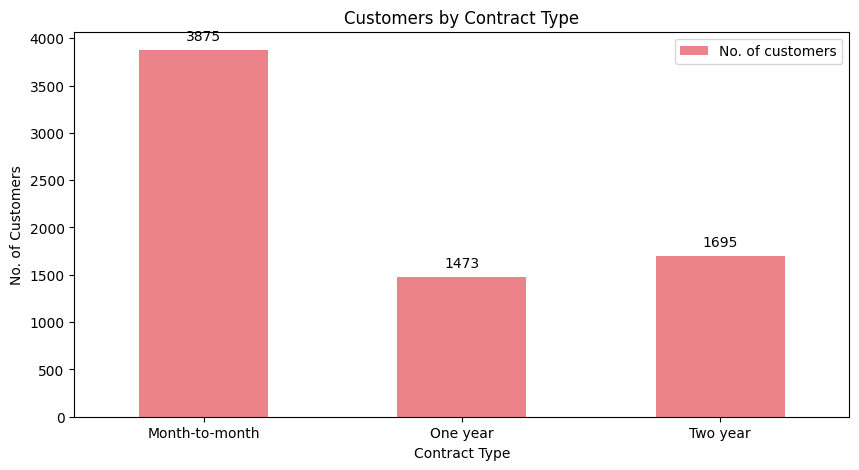

In [121]:
# Analyze distribution of Key Categorical Variables

# Distribution of Contract Type
contract_split = dataset[[ "customerID", "Contract"]]
sectors = contract_split.groupby ("Contract")
contract_split = pd.DataFrame(sectors["customerID"].count())
contract_split.rename(
    columns={'customerID':'No. of customers'},
    inplace=True
)

ax = contract_split[["No. of customers"]].plot.bar(
    title='Customers by Contract Type',
    legend=True,
    table=False,
    grid=False,
    subplots=False,
    figsize=(10, 5),
    color='#ec838a',
    stacked=False
)

plt.ylabel(
    'No. of Customers',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Contract Type',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Customers by Contract Type',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)

plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(contract_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

What can be derived from above diagram?

Answer:

1. Mayoritas pelanggan menggunakan kontrak bulanan (Month-to-month) dengan jumlah 3,875 pelanggan.
2. Pelanggan dengan kontrak satu tahun jauh lebih sedikit (1,473 pelanggan).
3. Pelanggan dengan kontrak dua tahun sedikit lebih banyak dibandingkan satu tahun, tetapi masih jauh lebih sedikit dibandingkan kontrak bulanan (1,695 pelanggan).




Perusahaan mungkin perlu mendorong lebih banyak pelanggan untuk memilih kontrak jangka panjang guna mengurangi churn.

Analisis churn berdasarkan jenis kontrak bisa dilakukan untuk melihat apakah pelanggan kontrak bulanan memiliki tingkat churn lebih tinggi dibandingkan pelanggan kontrak satu atau dua tahun.


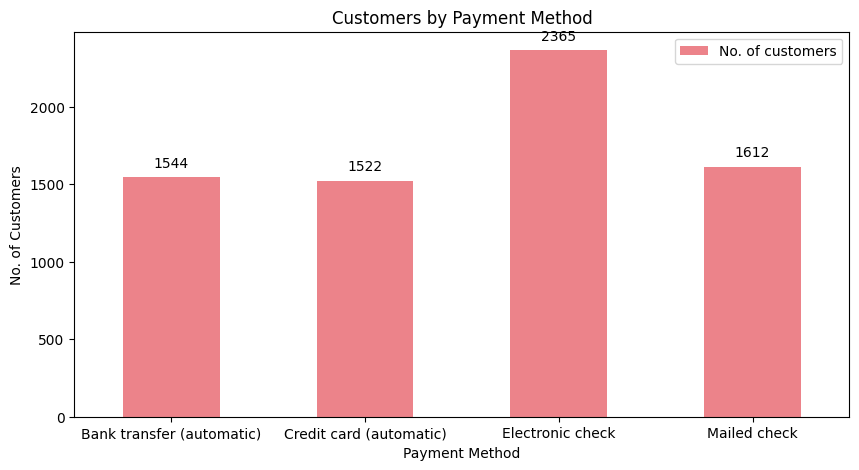

In [122]:
# Distribution of Payment Method Type

payment_method_split = dataset[[ "customerID", "PaymentMethod"]]
sectors = payment_method_split.groupby ("PaymentMethod")
payment_method_split = pd.DataFrame(sectors["customerID"].count())
payment_method_split.rename(
    columns={'customerID':'No. of customers'},
    inplace=True
)

ax = payment_method_split[["No. of customers"]].plot.bar(
    title='Customers by Payment Method',
    legend=True,
    table=False,
    grid=False,
    subplots=False,
    figsize=(10, 5),
    color='#ec838a',
    stacked=False
)

plt.ylabel(
    'No. of Customers',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Payment Method',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Customers by Payment Method',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(payment_method_split[["No. of customers"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

What can be derived from above diagram?

Answer:

1. Metode pembayaran yang paling banyak digunakan adalah "Electronic check", dengan 2,365 pelanggan.
2. Metode pembayaran otomatis seperti "Bank transfer (1,544 pelanggan)" dan "Credit card (1,522 pelanggan)" memiliki jumlah yang lebih rendah dibandingkan electronic check.
3. "Mailed check" digunakan oleh 1,612 pelanggan, sedikit lebih tinggi dibandingkan transfer bank dan kartu kredit otomatis.

Pelanggan yang menggunakan "Electronic check" mungkin memiliki tingkat churn lebih tinggi, karena pembayaran manual bisa lebih mudah dihentikan.

Perusahaan bisa mendorong pelanggan untuk beralih ke metode pembayaran otomatis guna meningkatkan retensi dan mengurangi churn.

Perlu dilakukan analisis lebih lanjut terkait hubungan antara metode pembayaran dan churn rate untuk memastikan apakah ada korelasi yang signifikan.

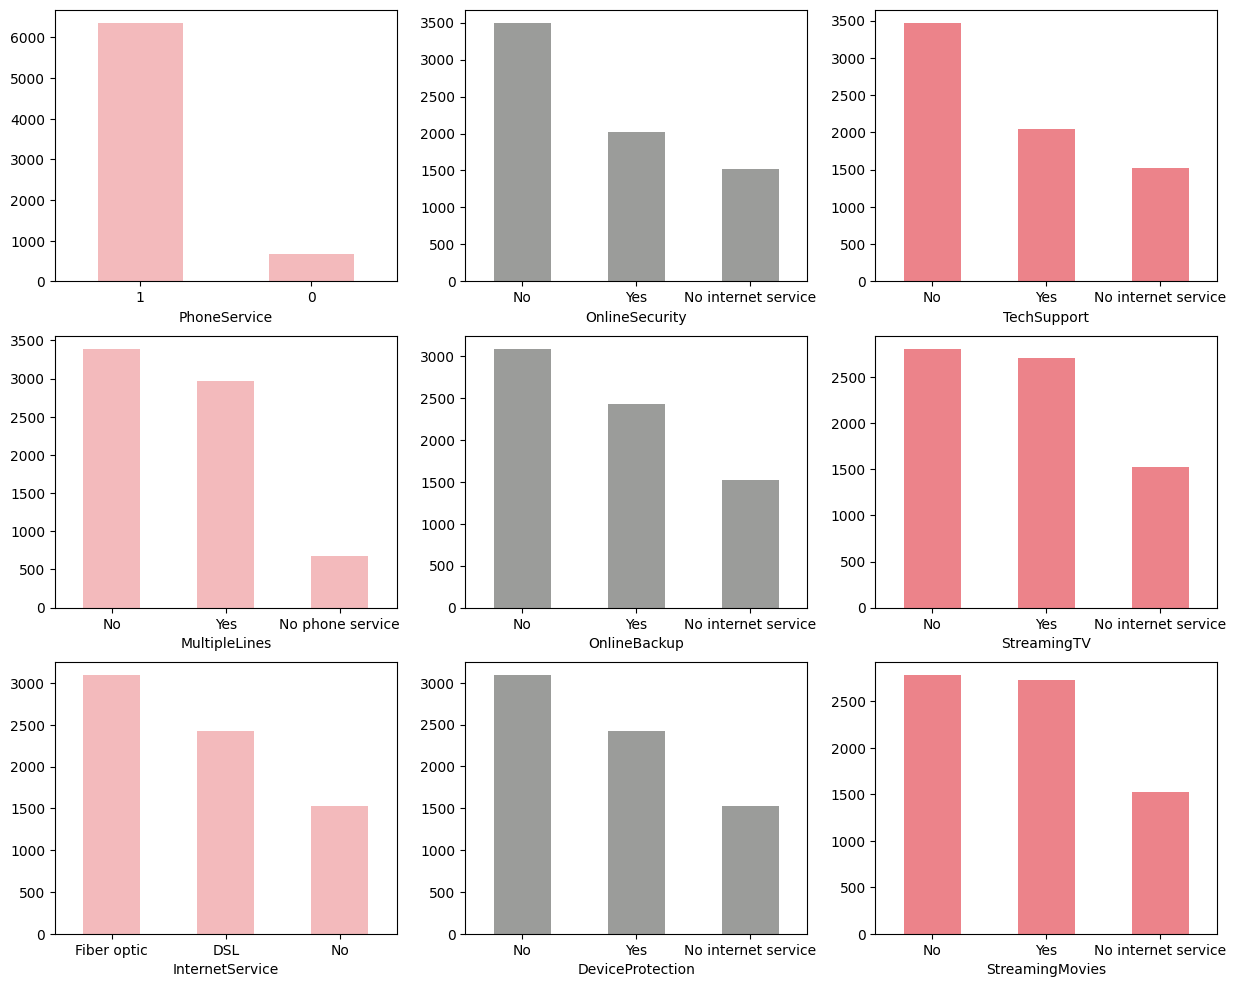

In [123]:
# Distribution of various Label Encoded Categorical Variables

services = [
    'PhoneService','MultipleLines',
    'InternetService','OnlineSecurity',
    'OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV',
    'StreamingMovies'
]

fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15,12)
)

for i, item in enumerate(services):
    if i < 3:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i, 0],
            rot=0, color='#f3babc'
        )

    elif i >= 3 and i < 6:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i-3, 1],
            rot=0, color ='#9b9c9a'
        )

    elif i < 9:
        ax = dataset[item].value_counts().plot(
            kind='bar', ax=axes[i-6, 2],
            rot=0, color='#ec838a'
        )

## What are the insights from above diagrams? (Task 1!)

Supposed to be blank!

Answer:

1. Peluang Upselling: Banyak pelanggan tidak menggunakan layanan tambahan seperti keamanan online, backup, atau proteksi perangkat. Perusahaan bisa menawarkan paket bundling atau promosi untuk meningkatkan adopsi layanan ini.

2. Churn & Layanan Tambahan: Perlu dianalisis lebih lanjut apakah pelanggan tanpa layanan tambahan lebih cenderung untuk churn dibandingkan pelanggan yang mengambil paket lengkap.

3. Dukungan Teknis: Rendahnya langganan dukungan teknis bisa menjadi tantangan jika pelanggan mengalami masalah layanan, sehingga perusahaan bisa mempertimbangkan program edukasi atau diskon untuk meningkatkan adopsi layanan ini.

4. Layanan Streaming: Bisa ada strategi pemasaran untuk menarik pelanggan non-streaming agar mulai menggunakan layanan ini, terutama yang sudah memiliki internet service tetapi belum memanfaatkannya secara penuh.

<ipython-input-124-32d2488afbee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(


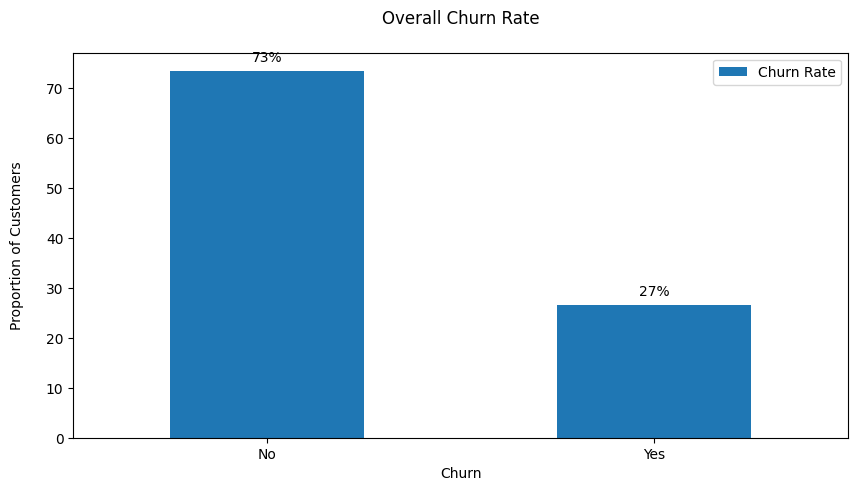

In [124]:
# Analyze Churn Rate by Categorical variables:

#(1) Overall Churn Rate
import matplotlib.ticker as mtick
churn_rate = dataset[["Churn","customerID"]]
churn_rate["churn_label"] = pd.Series(
    np.where((churn_rate["Churn"] == 0), "No", "Yes")
)

sectors = churn_rate.groupby("churn_label")
churn_rate = pd.DataFrame(sectors["customerID"].count())
churn_rate["Churn Rate"] = (churn_rate["customerID"] / sum(churn_rate["customerID"])) * 100

ax = churn_rate[["Churn Rate"]].plot.bar(
    title="Overall Churn Rate", legend=True,
    table=False, grid=False, figsize=(10,5)
)

plt.ylabel(
    'Proportion of Customers\n',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.xlabel(
    'Churn',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.title(
    'Overall Churn Rate\n',
    horizontalalignment="center",
    fontstyle="normal",
    fontfamily="sans-serif"
)
plt.legend(loc='upper right')
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

x_labels = np.array(churn_rate[["customerID"]])

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.0f}%".format(y_value)
        ax.annotate(
            label,
            (x_value, y_value),
            xytext=(0, space),
            textcoords="offset points",
            ha='center',
            va=va)

add_value_labels(ax)

In [125]:
dataset[['Contract', 'Churn']].value_counts()

Contract        Churn
Month-to-month  0        2220
                1        1655
Two year        0        1647
One year        0        1307
                1         166
Two year        1          48
Name: count, dtype: int64

In [128]:
dataset[['PaymentMethod', 'Churn']].value_counts()

,,count
PaymentMethod,Churn,
Mailed check,0,1304
Electronic check,0,1294
Credit card (automatic),0,1290
Bank transfer (automatic),0,1286
Electronic check,1,1071
Mailed check,1,308
Bank transfer (automatic),1,258
Credit card (automatic),1,232


# 8.&nbsp;Encode Categorical Data

In [129]:
# Incase if user_id is an object:
identity = dataset["customerID"]
dataset = dataset.drop(columns="customerID")

# convert rest of categorical variable into dummy
dataset= pd.get_dummies(dataset)

# Rejoin userid to dataset (column concatenation)
dataset = pd.concat(
    [dataset, identity],
    axis=1
)

In [130]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
0,0,0,1,0,1,0,1,29.85,29.85,0,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,7590-VHVEG
1,1,0,0,0,34,1,0,56.95,1889.50,0,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True,5575-GNVDE
2,1,0,0,0,2,1,1,53.85,108.15,1,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,3668-QPYBK
3,1,0,0,0,45,0,0,42.30,1840.75,0,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,True,False,True,False,False,False,7795-CFOCW
4,0,0,0,0,2,1,1,70.70,151.65,1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,9237-HQITU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,84.80,1990.50,0,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,6840-RESVB
7039,0,0,1,1,72,1,1,103.20,7362.90,0,False,False,True,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,True,False,True,False,False,True,False,False,2234-XADUH
7040,0,0,1,1,11,0,1,29.60,346.45,0,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,4801-JZAZL
7041,1,1,1,0,4,1,1,74.40,306.60,1,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,8361-LTMKD


# 9.&nbsp;Split Dataset into Dependent and Independent Variables

In [131]:
# identify response variable:
x = dataset.drop(columns="Churn") # independent
y = dataset["Churn"] # dependent => target

# 10.&nbsp;Generate training and test datasets of dependent and independent variables


In [132]:
#Step 12: Generate training and test datasets of dependent and independent variables

X_train, X_test, y_train, y_test = train_test_split(
    x, y,
    stratify=y, # stratify berdasarkan data yang minoritas
    test_size = 0.2, # use 0.1 if data is huge.
    random_state = 0
)

# to resolve any class imbalance - use stratify parameter.

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5634, 41)
Number transactions y_train dataset:  (5634,)
Number transactions X_test dataset:  (1409, 41)
Number transactions y_test dataset:  (1409,)


In [133]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,customerID
2499,1,0,0,1,41,1,0,70.20,2894.55,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True,6061-GWWAV
5807,1,0,0,0,57,1,0,18.80,1094.35,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,8464-EETCQ
5118,0,0,1,0,42,1,1,85.90,3729.75,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False,7621-VPNET
275,1,0,1,0,5,1,1,85.40,401.10,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,6432-TWQLB
1350,0,0,1,0,67,1,0,65.65,4322.85,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,4102-HLENU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,6303-KFWSL
1954,1,0,0,0,1,1,1,75.45,75.45,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False,5834-ASPWA
525,1,0,0,0,52,1,0,91.25,4738.30,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,0750-EBAIU
5748,0,0,0,0,21,1,1,99.85,1992.55,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,4686-UXDML


# 11.&nbsp;Removing Identifiers

In [134]:
# Step 13: Removing Identifiers
train_id = X_train["customerID"]
X_train = X_train.drop(columns=["customerID"])

test_id = X_test["customerID"]
X_test = X_test.drop(columns=["customerID"])

In [135]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,1,0,0,1,41,1,0,70.20,2894.55,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,False,True
5807,1,0,0,0,57,1,0,18.80,1094.35,True,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False
5118,0,0,1,0,42,1,1,85.90,3729.75,False,False,True,False,True,False,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,True,False,False
275,1,0,1,0,5,1,1,85.40,401.10,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False
1350,0,0,1,0,67,1,0,65.65,4322.85,False,False,True,True,False,False,False,False,True,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,0,0,0,0,29,1,1,55.25,1620.20,False,False,True,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
1954,1,0,0,0,1,1,1,75.45,75.45,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,False
525,1,0,0,0,52,1,0,91.25,4738.30,True,False,False,False,True,False,False,False,True,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False
5748,0,0,0,0,21,1,1,99.85,1992.55,False,False,True,False,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False


# 12.&nbsp;Feature Scaling

In [136]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

In [137]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2499,0.996103,-0.444067,-0.961343,1.545268,0.363266,0.327252,-1.203537,0.193982,0.284356,1.030277,-0.327252,-0.847780,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,-0.818733,-0.529854,1.278739,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,-0.707107,1.825882
5807,0.996103,-0.444067,-0.961343,-0.647137,1.016103,0.327252,-1.203537,-1.515002,-0.514162,1.030277,-0.327252,-0.847780,-0.731253,-0.872769,1.887311,-0.986250,1.887311,-0.635561,-0.881957,1.887311,-0.722982,-0.888655,1.887311,-0.717014,-1.00071,1.887311,-0.624290,-0.818733,1.887311,-0.782021,-0.808189,1.887311,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,1.884380,-0.707107,-0.547680
5118,-1.003913,-0.444067,1.040211,-0.647137,0.404069,0.327252,0.830884,0.715987,0.654827,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,1.884380,-0.707107,-0.547680
275,0.996103,-0.444067,1.040211,-0.647137,-1.105616,0.327252,0.830884,0.699362,-0.821668,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,-1.00071,-0.529854,1.601819,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1350,-1.003913,-0.444067,1.040211,-0.647137,1.424126,0.327252,-1.203537,0.042700,0.917910,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,-0.986250,-0.529854,1.573414,-0.881957,-0.529854,1.383161,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,-0.510573,1.787480,-0.525181,-0.530678,-0.707107,1.825882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1712,-1.003913,-0.444067,-0.961343,-0.647137,-0.126361,0.327252,0.830884,-0.303086,-0.280910,-0.970613,-0.327252,1.179551,1.367515,-0.872769,-0.529854,1.013942,-0.529854,-0.635561,-0.881957,-0.529854,1.383161,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,-1.116428,1.958584,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
1954,0.996103,-0.444067,-0.961343,-0.647137,-1.268825,0.327252,0.830884,0.368538,-0.966118,-0.970613,-0.327252,1.179551,-0.731253,1.145778,-0.529854,1.013942,-0.529854,-0.635561,1.133842,-0.529854,-0.722982,1.125296,-0.529854,-0.717014,0.99929,-0.529854,-0.624290,1.221400,-0.529854,-0.782021,1.237335,-0.529854,-0.792372,0.895714,-0.510573,-0.559447,-0.525181,-0.530678,1.414214,-0.547680
525,0.996103,-0.444067,-0.961343,-0.647137,0.812091,0.327252,-1.203537,0.893867,1.102192,1.030277,-0.327252,-0.847780,-0.731253,1.145778,-0.529854,-0.986250,-0.529854,1.573414,1.133842,-0.529854,-0.722982,-0.888655,-0.529854,1.394673,0.99929,-0.529854,-0.624

# 13.&nbsp;Model Selection

In [138]:
# Step 15.1: Compare Baseline Classification Algorithms - First Iteration
# Using Accuracy and ROC AUC Mean Metrics

models = []
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced')))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,criterion='entropy',random_state = 0)))
models.append(('Decision Tree',DecisionTreeClassifier(criterion='entropy',random_state = 0)))
models.append(('XGBoost',XGBClassifier(n_estimators=100,random_state = 0)))
models.append(('AdaBoost',AdaBoostClassifier(n_estimators=100,random_state = 0)))
models.append(('GradientBoost',GradientBoostingClassifier(n_estimators=100,random_state = 0)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)))

#Evaluating Model Results:
acc_results = [] # Acc => ketika dataset lebih seimbang
auc_results = [] # ROC-AUC => ketika dataset imbalance
names = []

#set table to populate with performance result
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns = col)

#Evaluate model
i = 0
for name, model in models:
    kfold = KFold(n_splits = 10) #10 Cross validation
    cv_acc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_auc_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] =[
        name,
        round(cv_auc_results.mean()*100,2),
        round(cv_auc_results.std()*100,2),
        round(cv_acc_results.mean()*100,2),
        round(cv_acc_results.std()*100,2)
    ]
    i += 1

model_results.sort_values(
    by=['ROC AUC Mean'], ascending = False
)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
5,GradientBoost,84.56,1.99,80.17,1.43
4,AdaBoost,84.49,1.91,80.08,0.63
0,Logistic Regression,84.35,1.63,74.46,1.17
1,Random Forest,82.30,2.17,78.90,1.43
3,XGBoost,82.06,2.17,78.72,1.70
6,KNN,77.28,2.07,75.93,0.91
2,Decision Tree,66.94,2.22,73.66,1.52


# 14.&nbsp;Homework!
Do the exact same modelling process, but with preprocessing: **handling imbalance data!**

## Generate training and test datasets of dependent and independent variables


In [141]:
# Generate training and test datasets of dependent and independent variables
X_train, X_test, y_train, y_test = train_test_split(
    x, y, stratify = y, test_size = 0.2, random_state = 0
)

In [142]:
print('Raw Data Target Percentage')
print('Churn : {:.2f}%'.format(y.value_counts()[1]/y.value_counts().sum()*100))
print('Not Churn : {:.2f}%'.format(y.value_counts()[0]/y.value_counts().sum()*100))

Raw Data Target Percentage
Churn : 26.54%
Not Churn : 73.46%


In [143]:
# Removing Identifiers
train_id = X_train["customerID"]
X_train = X_train.drop(columns=["customerID"])

test_id = X_test["customerID"]
X_test = X_test.drop(columns=["customerID"])

## Feature Scaling

In [144]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

### SMOTE Oversampling

Tahap oversampling ini dilakukan pada tahap setelah data split dan cross validation ROC_AUC Scoring. Lalu hanya diaplikasikan hanya pada training set. Hal tersebut dikarenakan kalau dilakukan pada tahap sebelum splitting dan Cross_validation maka akan merubah hasil validation menjadi 50: 50 sementara seharusnya yaitu sekitar 74 : 26.

In [146]:
from imblearn.over_sampling import SMOTE
# smote pada training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("before SMOTE:")
print(y_train.value_counts(normalize=True))
print("after SMOTE:")
print(y_train_smote.value_counts(normalize=True))

before SMOTE:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
after SMOTE:
Churn
0    0.5
1    0.5
Name: proportion, dtype: float64


In [145]:
np.unique(y_test, return_counts=1)

(array([0, 1]), array([1035,  374]))

### Compare Baseline Classification Algorithms (After SMOTE)

In [154]:
# Compare Baseline Model (second Iteration) (SMOTE applied)
# Use the same models as above
from sklearn.model_selection import StratifiedKFold

results_sm_try = pd.DataFrame(columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD',
                                   'Precision Mean', 'Recall Mean', 'F2 Mean'])

f2_scorer = make_scorer(fbeta_score, beta=2)
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

for i, (name, model) in enumerate(models):
    # Cross-validation scores
    scores = cross_validate(model, X_train_smote, y_train_smote, cv=skfold, scoring={
        'roc_auc': 'roc_auc',
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f2': f2_scorer
    })

    # Store results
    results_sm.loc[i] = [
        name,
        round(scores['test_roc_auc'].mean() * 100, 2),
        round(scores['test_roc_auc'].std() * 100, 2),
        round(scores['test_accuracy'].mean() * 100, 2),
        round(scores['test_accuracy'].std() * 100, 2),
        round(scores['test_precision'].mean() * 100, 2),
        round(scores['test_recall'].mean() * 100, 2),
        round(scores['test_f2'].mean() * 100, 2)
    ]

# Sorting
results_sm.sort_values(["ROC AUC Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F2 Mean
3,XGBoost,93.38,0.58,85.09,1.08,85.18,85.00,85.02
5,GradientBoost,92.87,0.59,84.61,1.31,83.07,87.00,86.17
1,Random Forest,92.85,0.72,85.61,0.96,85.09,86.37,86.11
4,AdaBoost,91.27,0.74,82.33,0.82,80.55,85.29,84.28
6,KNN,86.95,1.10,79.63,1.22,74.03,91.37,87.27
0,Logistic Regression,85.93,0.86,77.86,1.18,75.73,82.05,80.69
2,Decision Tree,78.83,1.09,78.76,1.08,78.21,79.75,79.43


###Step 15.5. Visualize the results and compare the baseline algorithms

In [155]:
# Visualize the results and compare the baseline algorithms----------------------------------

# =======================================================================================================================
# Sort results based on the right classification metric:
# (Accuracy/ROC_AUC / Precision/Recall/F1/F2 scores)

# Since we have class imbalance. When we look into the business challenge,
# our false negatives will be costly and hence we need to Keep an eye onto the Precision, Recall & F2 score besides accuracy
# =======================================================================================================================

results_sm = results_sm.sort_values(
    ["Precision Mean", "Recall Mean", "F2 Mean"],
    ascending = False
)

results_sm

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F2 Mean
3,XGBoost,93.38,0.58,85.09,1.08,85.18,85.00,85.02
1,Random Forest,92.85,0.72,85.61,0.96,85.09,86.37,86.11
5,GradientBoost,92.87,0.59,84.61,1.31,83.07,87.00,86.17
4,AdaBoost,91.27,0.74,82.33,0.82,80.55,85.29,84.28
2,Decision Tree,78.83,1.09,78.76,1.08,78.21,79.75,79.43
0,Logistic Regression,85.93,0.86,77.86,1.18,75.73,82.05,80.69
6,KNN,86.95,1.10,79.63,1.22,74.03,91.37,87.27


## Train & Evaluate Chosen Model

In [156]:
# Train & evaluate Chosen Model---------------------------------------------
# XGB model
xgb_model = XGBClassifier(n_estimators=100, random_state = 0)

# Fit XGB Model on the Training dataset
xgb_model.fit(X_train_smote, y_train_smote)

# Predict the Test set results
model_pred = xgb_model.predict(X_test)

# Evaluate Model Results on Test Set:
print("Confusion matrix:")
print(confusion_matrix(y_test, model_pred))
print("Classification report:")
print(classification_report(y_test, model_pred))

Confusion matrix:
[[   0 1035]
 [   0  374]]
Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1035
           1       0.27      1.00      0.42       374

    accuracy                           0.27      1409
   macro avg       0.13      0.50      0.21      1409
weighted avg       0.07      0.27      0.11      1409



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The model is predicting only `1` for everything.<br>
1. Model overfits to SMOTE data
2. Recall = `1`, but precision is very bad, accuracy only 27% <br>
<br>
Saran: Pakai pipeline



In [158]:
# Compare Baseline Model (third Iteration) (pipeline)
# Use pipeline to apply smote in each group
# Use the same models as above
from imblearn.pipeline import Pipeline as ImbPipeline

results_sm_pipeline = pd.DataFrame(columns=['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD',
                                   'Precision Mean', 'Recall Mean', 'F2 Mean'])

f2_scorer = make_scorer(fbeta_score, beta=2)

for i, (name, model) in enumerate(models):
    # Define Pipeline (scaling + SMOTE + model)
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    # Cross-validation scores
    scores = cross_validate(pipeline, X_train, y_train, cv=skfold, scoring={
        'roc_auc': 'roc_auc',
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f2': f2_scorer
    })

    # Store results
    results_sm_pipeline.loc[i] = [
        name,
        round(scores['test_roc_auc'].mean() * 100, 2),
        round(scores['test_roc_auc'].std() * 100, 2),
        round(scores['test_accuracy'].mean() * 100, 2),
        round(scores['test_accuracy'].std() * 100, 2),
        round(scores['test_precision'].mean() * 100, 2),
        round(scores['test_recall'].mean() * 100, 2),
        round(scores['test_f2'].mean() * 100, 2)
    ]

# Sort as needed
results_sm_pipeline.sort_values(["Precision Mean", "Recall Mean", "F2 Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F2 Mean
1,Random Forest,81.90,2.04,78.13,1.55,58.84,58.67,58.65
5,GradientBoost,84.46,1.86,78.68,2.06,58.62,67.77,65.66
3,XGBoost,81.87,2.33,77.72,1.91,58.19,56.86,57.07
4,AdaBoost,84.51,1.52,78.03,1.78,56.92,71.91,68.26
0,Logistic Regression,84.34,1.57,75.08,1.48,52.04,79.53,71.90
2,Decision Tree,66.74,2.43,72.08,1.76,47.76,55.26,53.54
6,KNN,74.98,2.72,68.23,2.17,43.91,70.37,62.78


Sort by recall and F2 score = minimizing missed churners

In [176]:
# Sort for churn analysis model
# Prioritize Recall and F2 score
results_sm_pipeline.sort_values(["Recall Mean", "F2 Mean", "Precision Mean", "ROC AUC Mean"], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD,Precision Mean,Recall Mean,F2 Mean
0,Logistic Regression,84.34,1.57,75.08,1.48,52.04,79.53,71.90
4,AdaBoost,84.51,1.52,78.03,1.78,56.92,71.91,68.26
6,KNN,74.98,2.72,68.23,2.17,43.91,70.37,62.78
5,GradientBoost,84.46,1.86,78.68,2.06,58.62,67.77,65.66
1,Random Forest,81.90,2.04,78.13,1.55,58.84,58.67,58.65
3,XGBoost,81.87,2.33,77.72,1.91,58.19,56.86,57.07
2,Decision Tree,66.74,2.43,72.08,1.76,47.76,55.26,53.54


In [172]:
# Train & evaluate Chosen Model---------------------------------------------
# Logistic Regression model pipeline
lr_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(solver='liblinear',random_state=0,class_weight='balanced'))
])

# Fit Logistic Regression Model on the Training dataset
lr_pipeline.fit(X_train, y_train)

# Predict the Test set results
lr_model_pred = lr_pipeline.predict(X_test)

# Evaluate Model Results on Test Set:
print("Confusion matrix:")
print(confusion_matrix(y_test, lr_model_pred))
print("Classification report:")
print(classification_report(y_test, lr_model_pred))

Confusion matrix:
[[764 271]
 [ 71 303]]
Classification report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.81      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



*True positive: 764* <br>
*True negative: 303* <br>
*False positive: 271* <br>
*False negative: 71* <br>

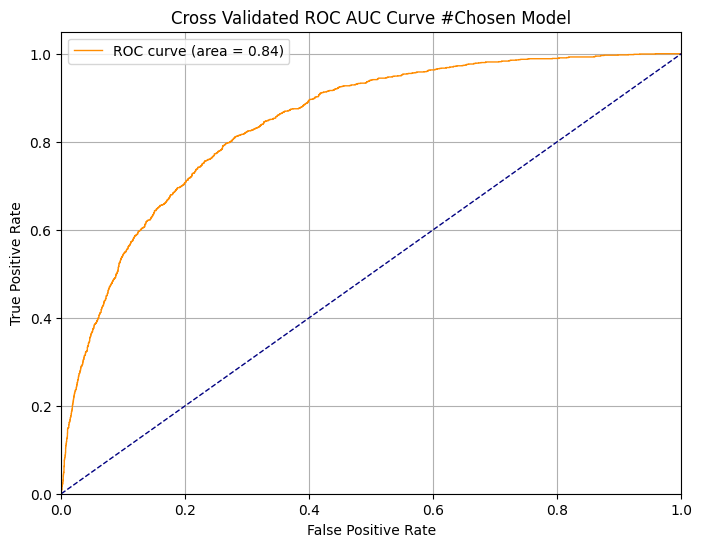

In [177]:
# Evaluate the model using ROC Graph
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
y_cv_probs = cross_val_predict(lr_pipeline, X_train, y_train, cv=skfold, method='predict_proba')[:,1]

# ROC-AUC from hyperparameter tuning chosen model (cross val)
fpr, tpr, _= roc_curve(y_train, y_cv_probs) # thresholds unused (_)
roc_auc = roc_auc_score(y_train, y_cv_probs)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross Validated ROC AUC Curve #Chosen Model')
plt.grid(True)
plt.legend()
plt.show()

##Analysis

---



In [178]:
print ('Result Before Oversampling : ')
print (model_results)
print ('  ')
print ('Result After Oversampling : ')
print (results_sm_pipeline)

Result Before Oversampling : 
             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy STD
0  Logistic Regression         84.35         1.63          74.46          1.17
1        Random Forest         82.30         2.17          78.90          1.43
2        Decision Tree         66.94         2.22          73.66          1.52
3              XGBoost         82.06         2.17          78.72          1.70
4             AdaBoost         84.49         1.91          80.08          0.63
5        GradientBoost         84.56         1.99          80.17          1.43
6                  KNN         77.28         2.07          75.93          0.91
  
Result After Oversampling : 
             Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  \
0  Logistic Regression         84.34         1.57          75.08   
1        Random Forest         81.90         2.04          78.13   
2        Decision Tree         66.74         2.43          72.08   
3              XGBoost         81.

Apa insight yang bisa didapat dengan handling data imbalance pada data diatas? Teknik apa yang anda gunakan? Jelaskan!

Answer:

1. Teknik menangani imbalance yang digunakan adalah SMOTE oversampling dengan bantuan pipeline.
2. Sebelum SMOTE dilakukan, data imbalance (74% dan 26%) dan akan bias terhadap kelas mayoritas atau `0` (non-churn).
3. Setelah SMOTE dilakukan (sebelum kfold cross-validation), data menjadi balance (50% dan 50%), **tetapi** terjadi **false positif yang tinggi** yang dapat disebabkan oleh **model yang sangat bias terhadap kelas** `1` (churn).
*   Beberapa test folds mungkin memiliki sintetik data dari training folds karena kelas `1` telah oversampled
* SMOTE sebelum cross-validation dapat menyebabkan data leakage
*   Nilai precision tidak dapat dihitung karena denominator = 0 (tidak ada positif untuk kelas `0`)
*   Model overfit ke SMOTE data (sampel minoritas sintetik), yaitu kelas `1`
4. Penggunaan SMOTE di dalam kfold cross-validation:
* Mencegah data leakage dan simulasi kondisi nyata
* Mencegah bias
5. Model dan hasil:
* Model yang dipilih: Logistic Regression
* Kelas `0` (non-churn): 764 TP, 271 FP
* Kelas `1` (churn): 303 TN, 71 FN
* Recall = 0.81 => minimisasi FN
* AUC = 0.84 => Skor bagus yang menandakan model yang kuat dalam membedakan churner dan non-churner


